<a href="https://colab.research.google.com/github/benvictoria17/MachineLearning/blob/master/divorce_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo pip install shap

     |████████████████████████████████| 358kB 5.0MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp36-cp36m-linux_x86_64.whl size=489391 sha256=a623baae56b5a502e583dd6752bcc86f4f895cd3fcd6a426c59e688b19aaf948
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap


In [2]:
import shap
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/pandas/master/dataset/divorce-prediction/divorce_data.csv', delimiter=';')
reference = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/pandas/master/dataset/divorce-prediction/reference.tsv', delimiter='|')

In [4]:
print(data.isnull().any().sum())
print(data.isna().any().sum())

0
0


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Divorce'),
 Text(0.5, 1.0, 'Distribution of Divorce categories')]

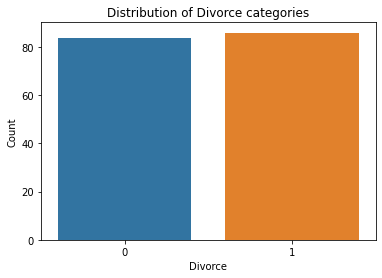

In [5]:
dist = sns.barplot(x=data['Divorce'].unique(), y=data['Divorce'].value_counts())
dist.set(xlabel = 'Divorce', ylabel = 'Count', title = 'Distribution of Divorce categories')

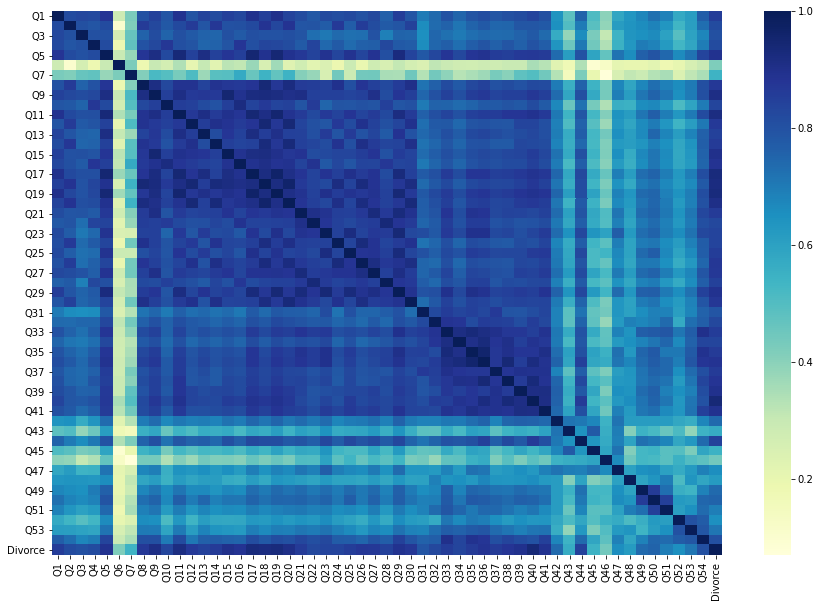

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), cmap="YlGnBu")
plt.show()

In [7]:
train_x, test_x = train_test_split(data, test_size=0.3)
train_y = train_x.pop('Divorce')
test_y = test_x.pop('Divorce')

In [8]:
forest = RandomForestClassifier()
forest.fit(train_x, train_y)

preds = forest.predict_proba(test_x)[:,1]

In [9]:
preds_bool = preds >= 0.5
accuracy = accuracy_score(test_y, preds_bool)
print('Accuracy :', accuracy)

Accuracy : 1.0


In [10]:
f1_value = f1_score(test_y, preds_bool)
print('F1 Score :', f1_value)

F1 Score : 1.0


In [11]:
explainer = shap.TreeExplainer(forest)
shap_value = explainer.shap_values(data)

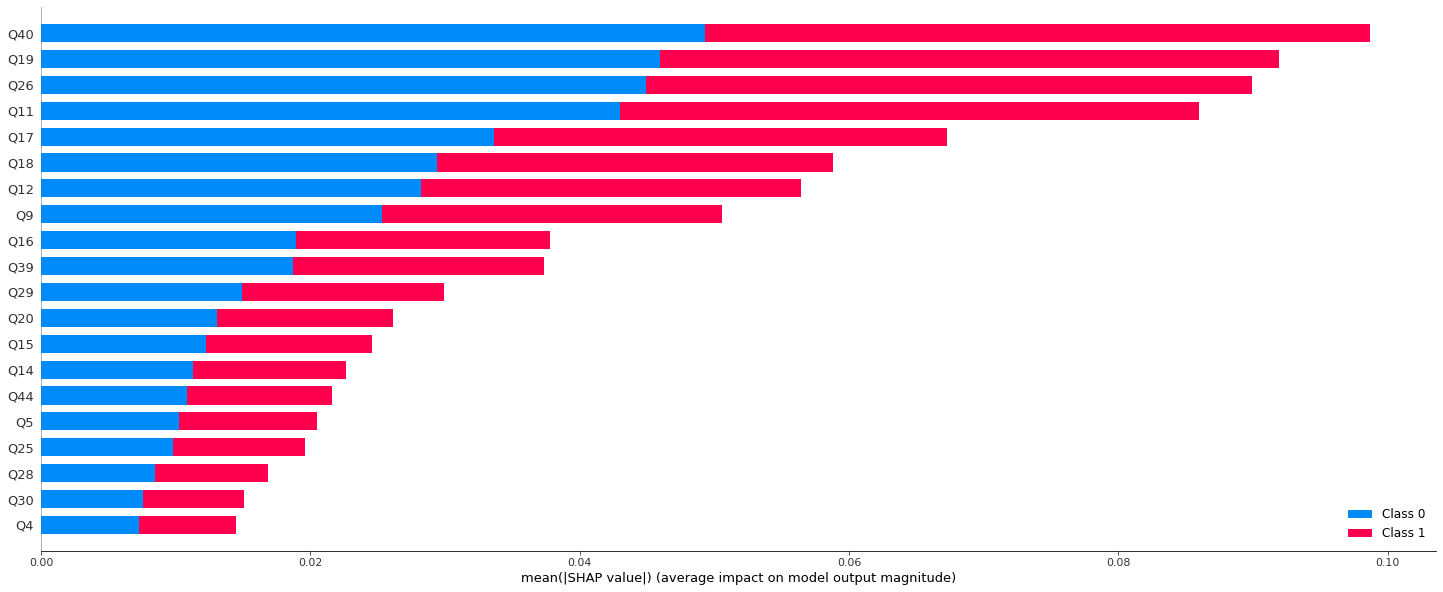

In [12]:
shap.summary_plot(shap_value, data, plot_type="bar", plot_size = (25,10))

In [13]:
param_grid={
    "max_depth" : np.arange(1, 20, 1),
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(2, 20, 2)
}

In [14]:
grid = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    scoring="accuracy",
    cv=5
)
grid

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando